### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # job_posted_date to a datetime type.
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #transforming str to list.

c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\sande\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Nov 14 15:14:06 2024).


### What is the most optimal skill to learn for Data Analysts?

In [2]:
#filtering for the US data analyst post
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

#droping NaN values for accurate visualization
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [3]:

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [4]:
#grouping data on job skills, performing agg on salary_year_avg to get the count and median salary for each skills
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

#renaming the coulumns to avoid confusion
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

#now to have percentage of all skills appering in job posting we need to divide the total jobs to each skill's count 
#so,first we will find total job posting by len()
DA_job_count = len(df_DA_US)

#or you can also do this
#DA_job_count = df_DA_US['job_title_short'].value_counts()

#now creating new column to have percentage of each skills appering in the job postings
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills



,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [5]:
#we have 170 rows of data which will make plot ambigious. Therefore, we will create some min percent limit to have some criteria to qualify

#we will create on variable and set min percent value to it
skill_percent = 5

#now we will filter df_DA_skillls using our min skill percent 
df_DA_skills = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Creating a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

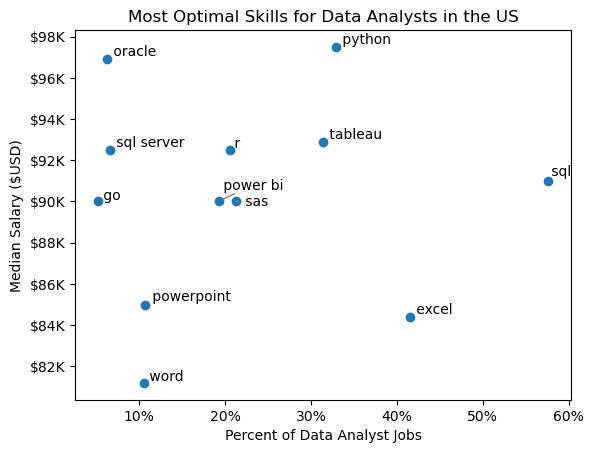

In [6]:
from adjustText import adjust_text

plt.scatter(df_DA_skills['skill_percent'], df_DA_skills['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

#we will also format x axis to have percent in it.for that we need to import one library
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))
# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Extra: Coloring by Technology



In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['outlook',
  'sharepoint',
  'tableau',
  'sas',
  'excel',
  'dax',
  'ssrs',
  'word',
  'powerbi',
  'sheets',
  'esquisse',
  'microstrategy',
  'visio',
  'sap',
  'datarobot',
  'ssis',
  'looker',
  'powerpoint',
  'cognos',
  'splunk',
  'ms access',
  'spreadsheet',
  'qlik',
  'spss',
  'alteryx',
  'msaccess',
  'power bi',
  'nuix'],
 'programming': ['golang',
  'typescript',
  'ruby',
  'scala',
  'kotlin',
  'r',
  'sas',
  'sass',
  'cobol',
  'elixir',
  'lua',
  'assembly',
  'matlab',
  'mongodb',
  'no-sql',
  'apl',
  'visualbasic',
  'perl',
  'delphi',
  'vba',
  'erlang',
  'rust',
  'crystal',
  'java',
  'haskell',
  'lisp',
  'php',
  'bash',
  'python',
  'css',
  'nosql',
  'visual basic',
  'c',
  't-sql',
  'julia',
  'fortran',
  'f#',
  'objective-c',
  'groovy',
  'sql',
  'c++',
  'swift',
  'powershell',
  'pascal',
  'vb.net',
  'c#',
  'shell',
  'html',
  'clojure',
  'mongo',
  'solidity',
  'go',
  'ocaml',
  'dart',
  'javascr

In [8]:
#now we will convert it in Dataframe and aside the coulumns as technology and skills

df_technology = pd.DataFrame((list(technology_dict.items())), columns= ['technology', 'skills'])

#explodings skills to have each skill in different row

df_technology = df_technology.explode('skills')

df_technology


,technology,skills
0,analyst_tools,outlook
0,analyst_tools,sharepoint
0,analyst_tools,tableau
0,analyst_tools,sas
0,analyst_tools,excel
...,...,...
9,sync,symphony
9,sync,ringcentral
9,sync,zoom
9,sync,wire


In [9]:
#now mergign with original Df

df_plot = df_DA_skills.merge(df_technology, left_on= 'job_skills', right_on= 'skills')


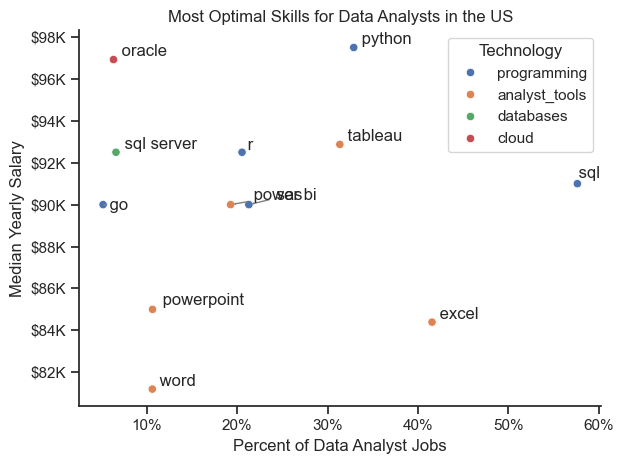

In [15]:
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')



#for text
texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))


# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()


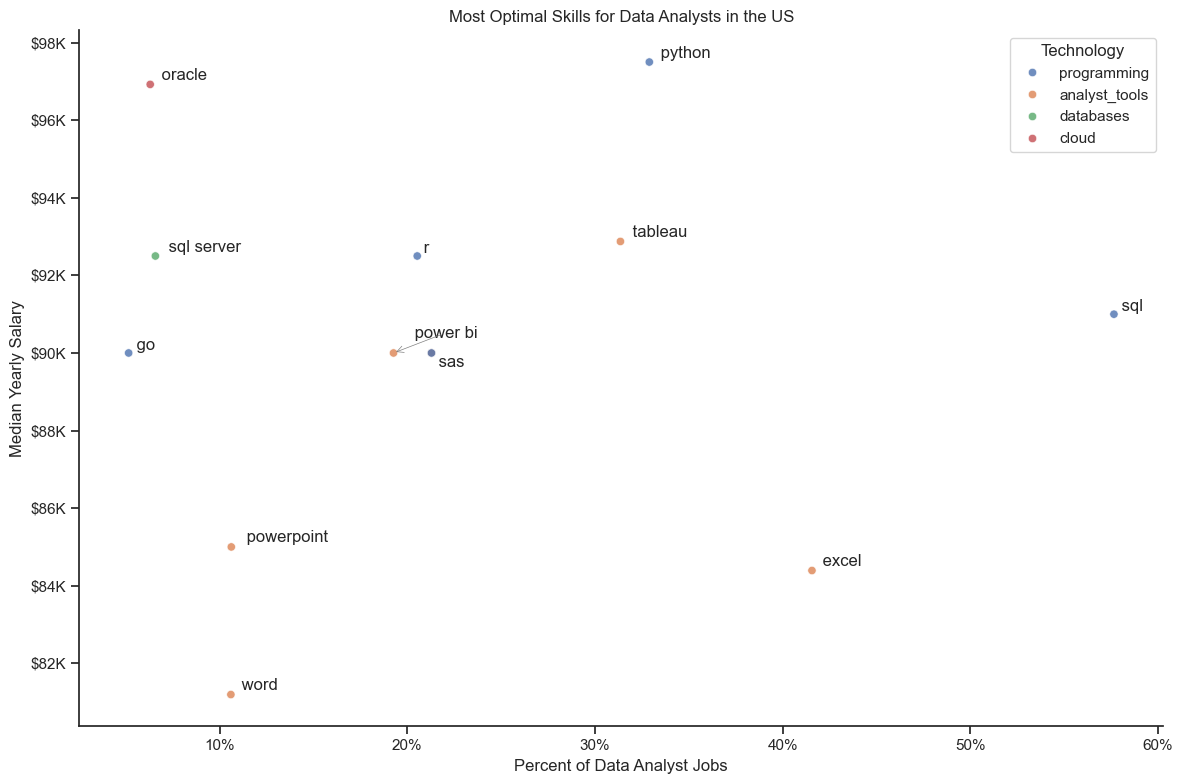

In [12]:
plt.figure(figsize=(12, 8))  # Increase figure size

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    alpha=0.8
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], 
                          df_DA_skills['median_salary'].iloc[i], 
                          " " + txt))

adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_points=(1.2, 1.2),
    force_text=(0.5, 0.5),
    force_points=(0.3, 0.3)
)

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()
